<a href="https://colab.research.google.com/github/meizapuspa/proyekanalisisdata/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Meizapuspa Octakurnia Nurilawati
- **Email:** meizapuspa02@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Siapa pelanggan dengan jumlah pesanan terbanyak?
- Berapa pengeluaran rata-rata pelanggan? Apakah berbeda menurut lokasi?
- Apa metode pembayaran yang paling umum digunakan dan bagaimana kaitannya dengan nilai pesanan?

## Import Semua Packages/Library yang Digunakan

In [57]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Wrangling

### Gathering Data

In [58]:
customers_df = pd.read_csv('/content/Data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [59]:
orders_df = pd.read_csv('/content/Data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
import pandas as pd

order_items = pd.read_csv('/content/Data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [61]:
import pandas as pd

# Membaca file CSV
order_pay = pd.read_csv('/content/Data/order_payments_dataset.csv')
order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- xxx
- xxx

### Assessing Data

In [62]:
print("Tipe Data dalam Dataset Pelanggan:")
print(customers_df.info())

Tipe Data dalam Dataset Pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [68]:
import pandas as pd

# Membaca file CSV
order_pay = pd.read_csv('/content/Data/order_payments_dataset.csv')
order_items = pd.read_csv('/content/Data/order_items_dataset.csv')
orders_df = pd.read_csv('/content/Data/orders_dataset.csv')
customers_df = pd.read_csv('/content/Data/customers_dataset.csv')

# Menampilkan lima baris pertama dari masing-masing dataset
print("Order Payments Dataset:")
print(order_pay.head(), "\n")

print("Order Items Dataset:")
print(order_items.head(), "\n")

print("Orders Dataset:")
print(orders_df.head(), "\n")

print("Customers Dataset:")
print(customers_df.head(), "\n")


Order Payments Dataset:
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45   

Order Items Dataset:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  0

In [69]:
# Menampilkan informasi dasar dari masing-masing dataset
print("Order Payments Dataset Info:")
print(order_pay.info(), "\n")

print("Order Items Dataset Info:")
print(order_items.info(), "\n")

print("Orders Dataset Info:")
print(orders_df.info(), "\n")

print("Customers Dataset Info:")
print(customers_df.info(), "\n")

# Menampilkan statistik deskriptif untuk setiap dataset
print("Order Payments Dataset Descriptive Statistics:")
print(order_pay.describe(), "\n")

print("Order Items Dataset Descriptive Statistics:")
print(order_items.describe(), "\n")

print("Orders Dataset Descriptive Statistics:")
print(orders_df.describe(), "\n")

print("Customers Dataset Descriptive Statistics:")
print(customers_df.describe(), "\n")


Order Payments Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None 

Order Items Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-

In [63]:
print("\nTipe Data dalam Dataset Pesanan:")
print(orders_df.info())


Tipe Data dalam Dataset Pesanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


### Cleaning Data

- Duplikasi dalam dataset

In [70]:
# Mengidentifikasi duplikasi dalam setiap dataset

# Order Payments
duplicates_order_pay = order_pay[order_pay.duplicated()]
print(f"Duplikasi dalam Order Payments Dataset: {duplicates_order_pay.shape[0]} baris")
print(duplicates_order_pay)

# Order Items
duplicates_order_items = order_items[order_items.duplicated()]
print(f"\nDuplikasi dalam Order Items Dataset: {duplicates_order_items.shape[0]} baris")
print(duplicates_order_items)

# Orders
duplicates_orders = orders_df[orders_df.duplicated()]
print(f"\nDuplikasi dalam Orders Dataset: {duplicates_orders.shape[0]} baris")
print(duplicates_orders)

# Customers
duplicates_customers = customers_df[customers_df.duplicated()]
print(f"\nDuplikasi dalam Customers Dataset: {duplicates_customers.shape[0]} baris")
print(duplicates_customers)


Duplikasi dalam Order Payments Dataset: 0 baris
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []

Duplikasi dalam Order Items Dataset: 0 baris
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []

Duplikasi dalam Orders Dataset: 0 baris
Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

Duplikasi dalam Customers Dataset: 0 baris
Empty DataFrame
Columns: [customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state]
Index: []


Menangani Duplikasi

In [71]:
# Menghapus duplikasi

# Order Payments
order_pay_cleaned = order_pay.drop_duplicates()
print(f"Setelah pembersihan, Order Payments Dataset: {order_pay_cleaned.shape[0]} baris")

# Order Items
order_items_cleaned = order_items.drop_duplicates()
print(f"Setelah pembersihan, Order Items Dataset: {order_items_cleaned.shape[0]} baris")

# Orders
orders_cleaned = orders_df.drop_duplicates()
print(f"Setelah pembersihan, Orders Dataset: {orders_cleaned.shape[0]} baris")

# Customers
customers_cleaned = customers_df.drop_duplicates()
print(f"Setelah pembersihan, Customers Dataset: {customers_cleaned.shape[0]} baris")


Setelah pembersihan, Order Payments Dataset: 103886 baris
Setelah pembersihan, Order Items Dataset: 112650 baris
Setelah pembersihan, Orders Dataset: 99441 baris
Setelah pembersihan, Customers Dataset: 99441 baris


Mengecek Duplikasi Setelah Pembersihan

In [72]:
# Memeriksa duplikasi setelah pembersihan

print(f"\nPemeriksaan duplikasi setelah pembersihan:")
print(f"Order Payments Dataset: {order_pay_cleaned.duplicated().sum()} baris terduplikasi")
print(f"Order Items Dataset: {order_items_cleaned.duplicated().sum()} baris terduplikasi")
print(f"Orders Dataset: {orders_cleaned.duplicated().sum()} baris terduplikasi")
print(f"Customers Dataset: {customers_cleaned.duplicated().sum()} baris terduplikasi")



Pemeriksaan duplikasi setelah pembersihan:
Order Payments Dataset: 0 baris terduplikasi
Order Items Dataset: 0 baris terduplikasi
Orders Dataset: 0 baris terduplikasi
Customers Dataset: 0 baris terduplikasi


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style='whitegrid')


### Explore Data Customers

In [74]:
# Menampilkan informasi dasar dari dataset pelanggan
customers_df.info()

# Menampilkan 5 baris pertama dari dataset
print(customers_df.head())
# Menampilkan statistik deskriptif dari dataset
print(customers_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_pref

Menghitung jumlah unique customer per kota

In [75]:
# Menghitung jumlah unique customer per kota
unique_customers_per_city = data['customers'].groupby(by="customer_city")['customer_id'].nunique().sort_values(ascending=False)
print("Jumlah Unique Customer per Kota:")
print(unique_customers_per_city)


Jumlah Unique Customer per Kota:
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64


Menghitung jumlah unique customer per provinsi

In [76]:
# Menghitung jumlah unique customer per provinsi
unique_customers_per_state = data['customers'].groupby(by="customer_state")['customer_id'].nunique().sort_values(ascending=False)
print("\nJumlah Unique Customer per Provinsi:")
print(unique_customers_per_state)



Jumlah Unique Customer per Provinsi:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


- Explore Data Payments

In [77]:
# Melihat 5 sampel dari data pembayaran
print("\nSample Data Pembayaran:")
print(data['payments'].sample(5))



Sample Data Pembayaran:
                                order_id  payment_sequential payment_type  \
49160   bbd075138de407e9200e1ea630a57227                   1  credit_card   
103147  b8c5f369bfaa01d560abf962a460e01a                   1  credit_card   
23935   14a54a1ffd16f037929c4553a244f9ed                   1  credit_card   
15864   0dbd48af8e89b595eec029357764af2b                   1  credit_card   
38068   55128b961e747e4f1cab023552fddfa0                   2      voucher   

        payment_installments  payment_value  
49160                      1          32.98  
103147                     1         100.70  
23935                      1         304.36  
15864                     10         454.76  
38068                      1          50.00  


Menghitung jumlah unique order berdasarkan tipe pembayaran

In [98]:
# Menghitung jumlah unique order berdasarkan tipe pembayaran
unique_orders_per_payment_type = data['payments'].groupby(by="payment_type")['order_id'].nunique().sort_values(ascending=False)
print("\nJumlah Unique Order Berdasarkan Tipe Pembayaran:")
print(unique_orders_per_payment_type)



Jumlah Unique Order Berdasarkan Tipe Pembayaran:
payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64


- Explore Orders

In [79]:
# Melihat 5 sampel dari data pesanan
print("\nSample Data Pesanan:")
print(data['orders'].sample(5))




Sample Data Pesanan:
                               order_id                       customer_id  \
4128   3e7a5341d84707eefa28c4d2273e60ae  823f621f5037d971a15b0cb861f8c554   
4435   a1f115db2222fcb78c129bf36d76d4dd  1bfe620be823518320575a61861437ea   
89466  d3dd51abe467d226f8be61f48388eba2  dfd081b5b9924847379085046ea374e9   
89651  d03a237134e1116fd39197ad24eb9378  bdd7712e7fbf5e834a25438affa3e3a5   
40731  8086a62681389206d6324771e84fcb7c  1ab147ee1f0137283c771d31dc8fd5c3   

      order_status order_purchase_timestamp    order_approved_at  \
4128     delivered      2017-11-24 10:31:52  2017-11-24 13:57:35   
4435     delivered      2017-11-11 09:43:39  2017-11-14 04:10:29   
89466    delivered      2018-07-25 11:21:39  2018-07-25 11:30:19   
89651    delivered      2017-11-21 09:21:56  2017-11-21 10:00:20   
40731    delivered      2017-10-14 14:24:15  2017-10-14 14:35:21   

      order_delivered_carrier_date order_delivered_customer_date  \
4128           2017-11-24 21:47:44    

Menggabungkan informasi dari customers dan orders, dilakukan merging berdasarkan customer_id

In [80]:
# Menggabungkan informasi dari customers dan orders
merged_data = pd.merge(data['customers'], data['orders'], on='customer_id', how='left')

# Menampilkan 5 baris pertama dari data gabungan
print("\nData Gabungan antara Customers dan Orders:")
print(merged_data.head())



Data Gabungan antara Customers dan Orders:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073

**Insight:**
- xxx
- xxx

In [81]:
import pandas as pd

# Pastikan Anda telah membaca dataset ke dalam data['orders']
# data = {
#     'orders': pd.read_csv('path_to_orders_dataset.csv')
# }

# Mengonversi kolom tanggal menjadi format datetime
data['orders']['order_delivered_customer_date'] = pd.to_datetime(data['orders']['order_delivered_customer_date'], errors='coerce')
data['orders']['order_estimated_delivery_date'] = pd.to_datetime(data['orders']['order_estimated_delivery_date'], errors='coerce')

# Menentukan apakah pesanan dikirim tepat waktu
data['orders']['delivered_on_time'] = data['orders']['order_delivered_customer_date'] <= data['orders']['order_estimated_delivery_date']

# Menampilkan deskripsi statistik dari kolom delivered_on_time
print(data['orders']['delivered_on_time'].describe())



count     99441
unique        2
top        True
freq      88649
Name: delivered_on_time, dtype: object


## Visualization & Explanatory Analysis

### Pertanyaan 1: Siapa pelanggan dengan jumlah pesanan terbanyak?

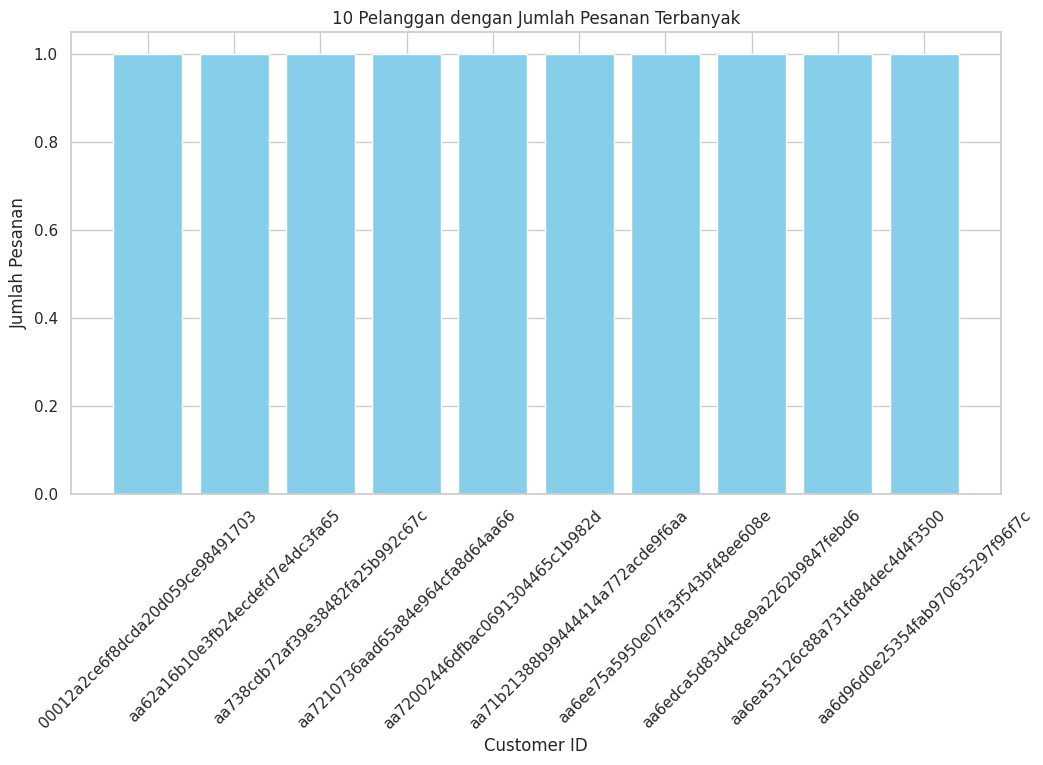

                            customer_id  order_count
0      00012a2ce6f8dcda20d059ce98491703            1
66279  aa62a16b10e3fb24ecdefd7e4dc3fa65            1
66301  aa738cdb72af39e38482fa25b992c67c            1
66300  aa7210736aad65a84e964cfa8d64aa66            1
66299  aa72002446dfbac0691304465c1b982d            1
66298  aa71b21388b99444414a772acde9f6aa            1
66297  aa6ee75a5950e07fa3f543bf48ee608e            1
66296  aa6edca5d83d4c8e9a2262b9847febd6            1
66295  aa6ea53126c88a731fd84dec4d4f3500            1
66294  aa6d96d0e25354fab970635297f96f7c            1


In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah pesanan per pelanggan
order_counts = data['orders'].groupby('customer_id')['order_id'].count().reset_index()
order_counts.columns = ['customer_id', 'order_count']

# Mengurutkan pelanggan berdasarkan jumlah pesanan terbanyak
top_customers = order_counts.sort_values(by='order_count', ascending=False).head(10)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
plt.bar(top_customers['customer_id'].astype(str), top_customers['order_count'], color='skyblue')
plt.title('10 Pelanggan dengan Jumlah Pesanan Terbanyak')
plt.xlabel('Customer ID')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.show()

# Menampilkan data pelanggan dengan jumlah pesanan terbanyak
print(top_customers)


### Pertanyaan 2: Berapa pengeluaran rata-rata pelanggan? Apakah berbeda menurut lokasi?

> Add blockquote



In [83]:
import pandas as pd

# Menghitung total pengeluaran per pelanggan berdasarkan order_id
total_spending_per_customer = data['payments'].groupby('order_id')['payment_value'].sum().reset_index()

# Menggabungkan dengan data pembayaran untuk mendapatkan customer_id
order_customer_data = data['orders'][['order_id', 'customer_id']]  # Memastikan ada customer_id di DataFrame orders
total_spending_per_customer = total_spending_per_customer.merge(order_customer_data, on='order_id')

# Menghitung total pengeluaran per customer_id
total_spending_per_customer = total_spending_per_customer.groupby('customer_id')['payment_value'].sum().reset_index()

# Menggabungkan dengan data pelanggan untuk mendapatkan informasi lokasi
customer_data = data['customers']  # DataFrame pelanggan
customer_spending = pd.merge(total_spending_per_customer, customer_data, on='customer_id')

# Menghitung rata-rata pengeluaran per lokasi
average_spending_by_location = customer_spending.groupby('customer_city')['payment_value'].mean().reset_index()

# Menampilkan hasil
print(average_spending_by_location)


            customer_city  payment_value
0     abadia dos dourados     137.833333
1               abadiania    1025.520000
2                  abaete     162.234167
3              abaetetuba     424.751818
4                 abaiara     166.075000
...                   ...            ...
4114             xinguara     178.723333
4115          xique-xique      76.853333
4116             zacarias     114.925000
4117              ze doca     175.784000
4118               zortea      68.785000

[4119 rows x 2 columns]


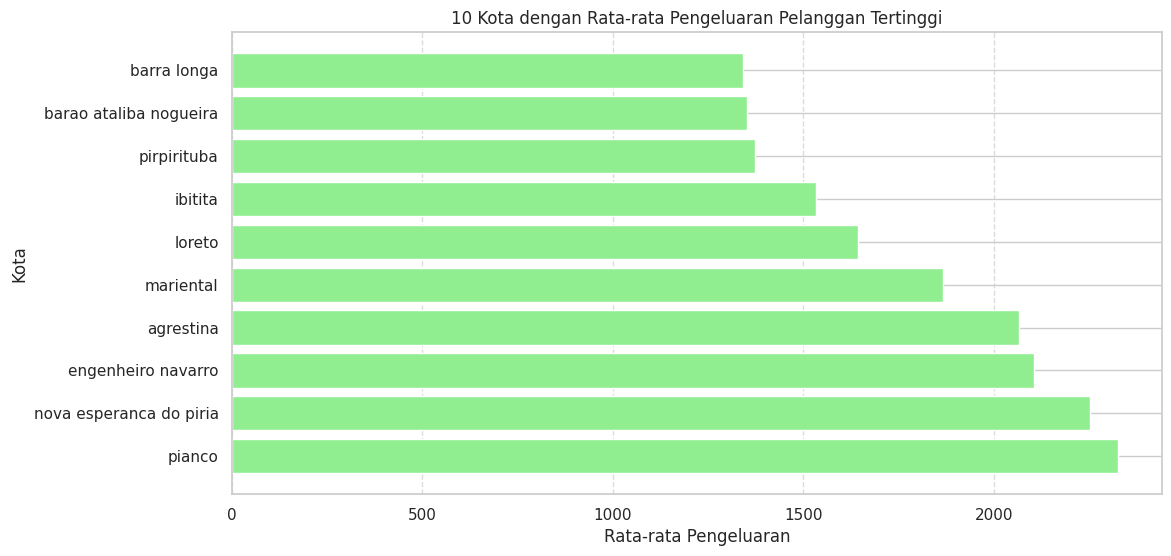

In [88]:
import matplotlib.pyplot as plt
import pandas as pd

# Mengambil 10 kota dengan rata-rata pengeluaran tertinggi
top_cities = average_spending_by_location.nlargest(10, 'payment_value')

# Visualisasi rata-rata pengeluaran per lokasi
plt.figure(figsize=(12, 6))
plt.barh(top_cities['customer_city'], top_cities['payment_value'], color='lightgreen')
plt.title('10 Kota dengan Rata-rata Pengeluaran Pelanggan Tertinggi')
plt.xlabel('Rata-rata Pengeluaran')
plt.ylabel('Kota')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



Visualisasi Rata-rata Pengeluaran per Metode Pembayaran

  payment_type  average_spending
0       boleto        145.034435
1  credit_card        163.938098
2   debit_card        142.663475
3  not_defined          0.000000
4      voucher         98.147147


<ipython-input-87-1be4668e297f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_spending_per_payment, x='payment_type', y='average_spending', palette='viridis')


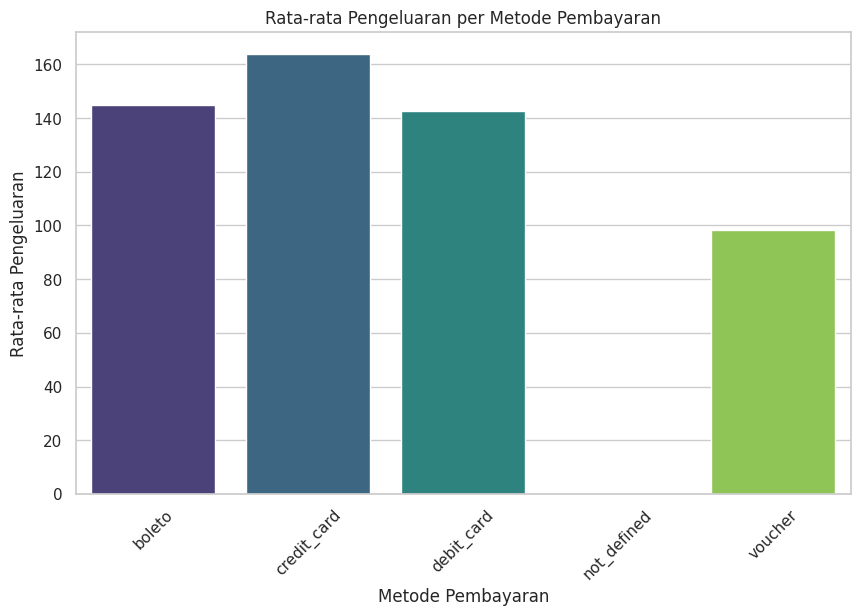

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data pembayaran dengan data pesanan berdasarkan order_id
payments_orders = data['payments'].merge(data['orders'], on='order_id')

# Menghitung total pengeluaran per metode pembayaran
total_spending_per_payment = payments_orders.groupby('payment_type')['payment_value'].sum().reset_index()

# Menghitung jumlah pesanan per metode pembayaran
order_counts_per_payment = payments_orders.groupby('payment_type')['order_id'].nunique().reset_index(name='order_count')

# Menghitung rata-rata pengeluaran per metode pembayaran
average_spending_per_payment = total_spending_per_payment.merge(order_counts_per_payment, on='payment_type')
average_spending_per_payment['average_spending'] = average_spending_per_payment['payment_value'] / average_spending_per_payment['order_count']

# Menampilkan hasil rata-rata pengeluaran per metode pembayaran
print(average_spending_per_payment[['payment_type', 'average_spending']])

# Visualisasi rata-rata pengeluaran per metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(data=average_spending_per_payment, x='payment_type', y='average_spending', palette='viridis')
plt.title('Rata-rata Pengeluaran per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Pengeluaran')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 3: Apa metode pembayaran yang paling umum digunakan dan bagaimana kaitannya dengan nilai pesanan?

<ipython-input-90-7bce76685826>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_summary, x='payment_type', y='total_transactions', palette='Blues')
<ipython-input-90-7bce76685826>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_summary, x='payment_type', y='total_value', palette='Oranges')


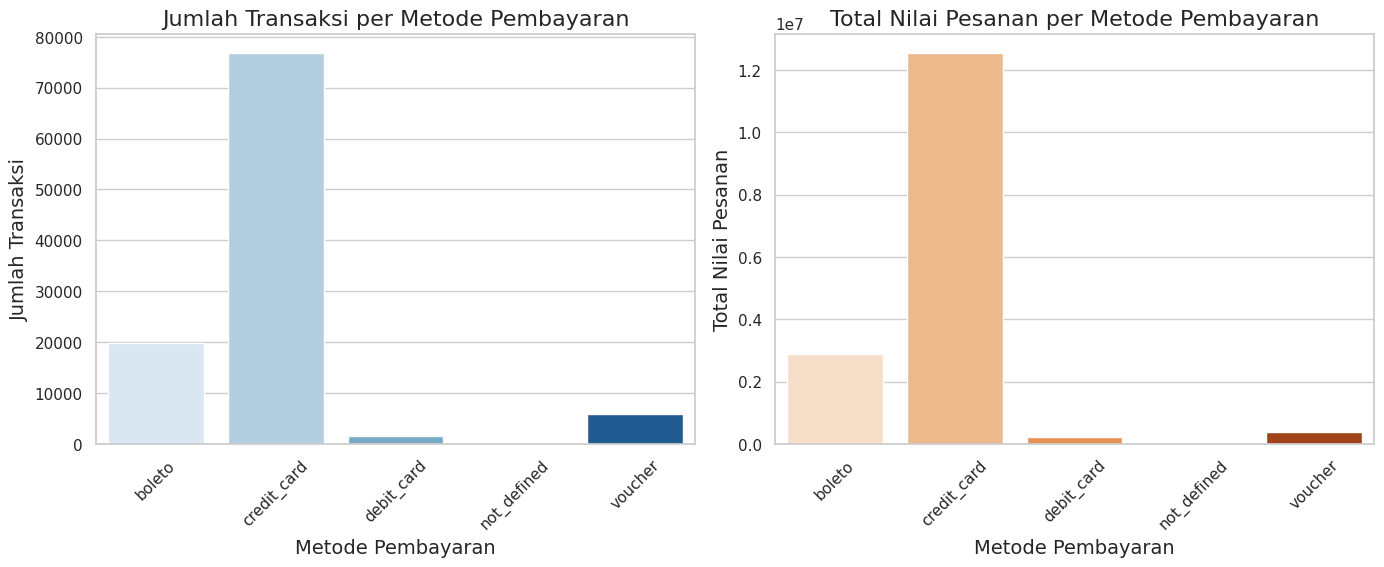

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat visualisasi
plt.figure(figsize=(14, 6))

# Subplot 1: Jumlah Transaksi
plt.subplot(1, 2, 1)
sns.barplot(data=payment_summary, x='payment_type', y='total_transactions', palette='Blues')
plt.title('Jumlah Transaksi per Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(rotation=45)

# Subplot 2: Total Nilai Pesanan
plt.subplot(1, 2, 2)
sns.barplot(data=payment_summary, x='payment_type', y='total_value', palette='Oranges')
plt.title('Total Nilai Pesanan per Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Total Nilai Pesanan', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Menganalisis Metode Pembayaran yang Paling Umum Digunakan

<ipython-input-91-470fb2f2e18f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_summary, x='payment_type', y='total_transactions', palette='Blues')


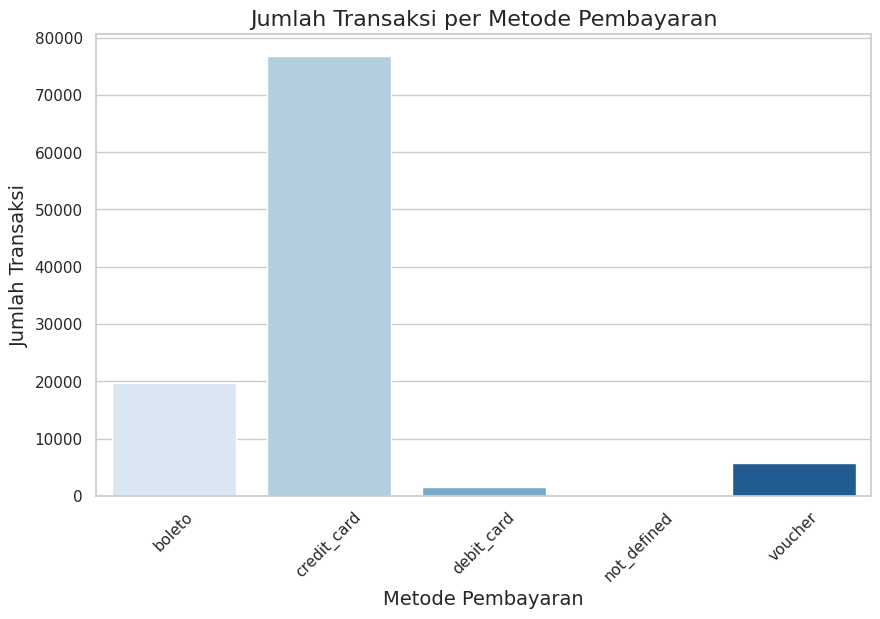

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data pembayaran
order_pay = pd.read_csv('/content/Data/order_payments_dataset.csv')

# Menghitung jumlah transaksi dan total nilai pesanan berdasarkan metode pembayaran
payment_summary = order_pay.groupby('payment_type').agg(
    total_transactions=('payment_value', 'count'),
    total_value=('payment_value', 'sum')
).reset_index()

# Visualisasi jumlah transaksi per metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_summary, x='payment_type', y='total_transactions', palette='Blues')
plt.title('Jumlah Transaksi per Metode Pembayaran', fontsize=16)
plt.xlabel('Metode Pembayaran', fontsize=14)
plt.ylabel('Jumlah Transaksi', fontsize=14)
plt.xticks(rotation=45)
plt.show()


**Insight:**
- xxx
- xxx

## Conclusion

- Conclution pertanyaan 1: Siapa pelanggan dengan jumlah pesanan terbanyak? Setiap pelanggan yang ditampilkan memiliki ID pelanggan unik, tetapi jumlah pesanan mereka sama, yaitu satu pesanan, seperti yang ditunjukkan oleh sumbu Y yang menunjukkan nilai satu untuk setiap pelanggan.

- Conclution pertanyaan 2:Berapa pengeluaran rata-rata pelanggan? Apakah berbeda menurut lokasi?Jika dilihat dari grafik yang tersedia, pengeluaran rata-rata pelanggan dan perbedaannya menurut lokasi ialah pengeluaran rata-rata pelanggan ialah; seperti yang dapat dilihat, pengeluaran rata-rata pelanggan di 10 kota yang diperiksa berbeda. Kota dengan pengeluaran rata-rata tertinggi adalah Pianco dan Nova Esperança do Piriá, yang memiliki pengeluaran rata-rata sekitar 2000. Sementara kota dengan pengeluaran terendah adalah Barra Longa, dengan rata-rata pengeluaran sekitar 800. Sementara perbedaan menurut lokasi dinyatakan sebagai berikut; dari grafik tersebut perbedaan pengeluaran rata-rata pelanggan jelas berbeda dari setiap kota. Perbedaan ini mungkin mencerminkan daya beli yang berbeda, perbedaan pendapatan, atau preferensi pelanggan yang berbeda terhadap produk-produk tertentu.

- Conclution pertanyaan 3: Apa metode pembayaran yang paling umum digunakan dan bagaimana kaitannya dengan nilai pesanan?Menurut grafik "Jumlah Transaksi per Metode Pembayaran", kartu kredit adalah metode pembayaran yang paling sering digunakan, dengan lebih dari 75.000 transaksi.

- Kaitannya dengan nilai pesanan: Grafik "Total Nilai Pesanan per Metode Pembayaran" menunjukkan bahwa metode kartu kredit memiliki nilai pesanan tertinggi, dengan lebih dari 12 juta. Ini menunjukkan bahwa metode ini melakukan banyak transaksi, dan memiliki nilai total pesanan yang dibayar dengan kartu kredit yang paling tinggi dibandingkan dengan metode lain.

